In [1]:
from sklearn import datasets, cross_validation, ensemble, tree

import pandas as pd
import numpy as np

# Подготовка данных
Загрузим dataset

In [2]:
Frame = datasets.load_digits()

Нам понадобятся поля data и target из Frame

In [3]:
data = Frame.data
target = Frame.target

# 1)Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score

In [4]:
estimator1 = tree.DecisionTreeClassifier()

In [5]:
ans = cross_validation.cross_val_score(estimator1, X=data, y=target, cv=10)
ans1 = ans.mean()

with open("random_forest_answer1.txt", "w") as fout:
        fout.write(str(ans1))
        print ans1

0.830359800226


# 2)Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100

In [6]:
estimator2 = ensemble.BaggingClassifier(n_estimators=100)

In [7]:
ans = cross_validation.cross_val_score(estimator2, X=data, y=target, cv=10)
ans2 = ans.mean()

with open("random_forest_answer2.txt", "w") as fout:
        fout.write(str(ans2))
        print ans2

0.922117370843


# 3)Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на sqrt(d) случайных признаков.

In [8]:
import math

features = int(math.sqrt(data.shape[1]))
estimator3 = ensemble.BaggingClassifier(n_estimators=100, max_features=features)

In [9]:
ans = cross_validation.cross_val_score(estimator3, X=data, y=target, cv=10)
ans3 = ans.mean()

with open("random_forest_answer3.txt", "w") as fout:
        fout.write(str(ans3))
        print ans3

0.933144310482


# 4)Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать.

In [10]:
tree = tree.DecisionTreeClassifier(max_features=features)
estimator4 = ensemble.BaggingClassifier(tree, n_estimators=100)

In [11]:
ans = cross_validation.cross_val_score(estimator4, X=data, y=target, cv=10)
ans4 = ans.mean()

with open("random_forest_answer4.txt", "w") as fout:
        fout.write(str(ans4))
        print ans4

0.951095072628


Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют

In [13]:
forest = ensemble.RandomForestClassifier()

forest_score = cross_validation.cross_val_score(forest, X=data, y=target, cv=10)
print forest_score.mean()

0.916384884156


In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1)Зависимость качества классификации от количества деревьев

In [28]:
n_trees = np.arange(start=5, stop=105, step=5)
scores = []
for i in n_trees:
    forest = ensemble.RandomForestClassifier(n_estimators=i)
    score = cross_validation.cross_val_score(forest, X=data, y=target, cv=10)
    scores.append(score.mean())

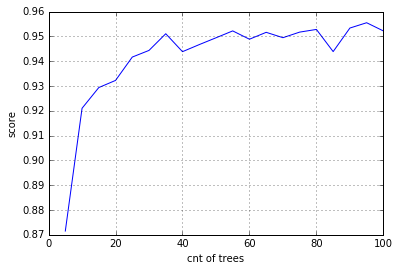

In [29]:
pylab.grid(True)
pylab.plot(n_trees, scores)
plt.xlabel("cnt of trees")
plt.ylabel("score")

Можно сделать вывод, что из предложенных утверждений про кол-во деревьев в RandomForest верны 2) и 3)

# 2)Зависимость качества классификации от количества признаков

In [30]:
n_features = np.arange(start=5, stop=65, step=5)
scores = []
for i in n_features:
    forest = ensemble.RandomForestClassifier(max_features=i)
    score = cross_validation.cross_val_score(forest, X=data, y=target, cv=10)
    scores.append(score.mean())

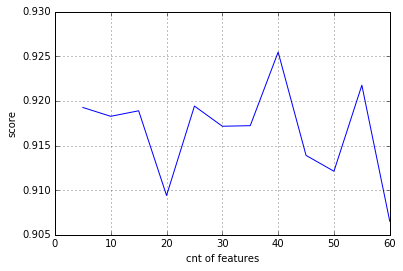

In [32]:
pylab.grid(True)
pylab.plot(n_features, scores)
plt.xlabel("cnt of features")
plt.ylabel("score")

Можно сделать вывод, что из  предложенных утверждений про кол-во признаков в RandomForest верно 4)

# 3)Зависимость качества классификации от глубины деревьев

In [33]:
depth = np.arange(start=1, stop=10, step=1)
scores = []
for i in depth:
    forest = ensemble.RandomForestClassifier(max_depth=i)
    score = cross_validation.cross_val_score(forest, X=data, y=target, cv=10)
    scores.append(score.mean())

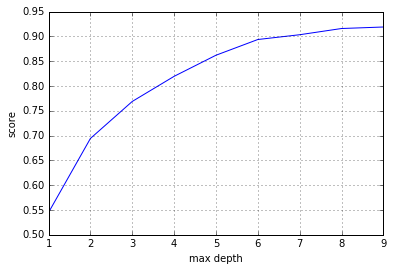

In [34]:
pylab.grid(True)
pylab.plot(depth, scores)
plt.xlabel("max depth")
plt.ylabel("score")

Можно сделать вывод, что из  предложенных утверждений про глубину деревьев в RandomForest верно 7)